In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
try:
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
except:
    print('wordcloud not installed; pip install wordcloud')

sns.set()
sdg_colors = ['#E5243B', '#DDA63A', '#4C9F38','#C5192D','#FF3A21','#26BDE2','#FCC30B','#A21942','#FD6925','#DD1367','#FD9D24','#BF8B2E','#3F7E44','#0A97D9','#56C02B','#00689D','#19486A']

In [19]:
#Preprocessing
df = pd.read_csv('data/allSDGtweets.csv', encoding='latin1')
df = df.drop(['Unnamed: 0', 'id','created_at','category'], axis=1)

In [20]:
df.head()

,text,lang,#sdg1,#sdg2,#sdg3,#sdg4,#sdg5,#sdg6,#sdg7,#sdg8,#sdg9,#sdg10,#sdg11,#sdg12,#sdg13,#sdg14,#sdg15,#sdg16,#sdg17,nclasses
0,"With 300 million people without #EnergyAccess,...",en,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
1,Happy new year 2019 to #Brussels #SDG11,en,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1
2,Nearly 4 000 new followers joined us on social...,en,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
3,In 2019 Promoting @Najim_Ali five simple #Pas...,en,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
4,Please download the #Safecity Mobile app on An...,en,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1


In [21]:
# Non-processed DataFrame
print(len(df))
print(len(df['text'].unique()))

# DataFrame containing English tweets only
en_df = df[df['lang'] == 'en']
print(len(en_df))
print(len(en_df['text'].unique()))



935241
801856
784441
670768


The DataFrame contains a lot of duplicates, lets remove those.

In [22]:
df = df.drop_duplicates('text')
en_df = en_df.drop_duplicates('text')

In [23]:
print(len(df), len(en_df))

801856 670768


Since we will only be working with the English tweets, it is the DataFrame we will proceed with.

## Number of tweets with $n$ labels

In [24]:
print(f"Number of english tweets:\t {len(en_df)} \t({np.round(len(en_df)/len(df)*100,2)}%)")
for i in range(18):
    print(f"Number of nclasses = {i} tweets:\t {len(en_df[en_df['nclasses'] == i])} \t({np.round(len(en_df[en_df['nclasses'] == i])/len(en_df)*100,2)}%)")

Number of english tweets:	 670768 	(83.65%)
Number of nclasses = 0 tweets:	 225985 	(33.69%)
Number of nclasses = 1 tweets:	 398080 	(59.35%)
Number of nclasses = 2 tweets:	 35283 	(5.26%)
Number of nclasses = 3 tweets:	 7709 	(1.15%)
Number of nclasses = 4 tweets:	 2036 	(0.3%)
Number of nclasses = 5 tweets:	 901 	(0.13%)
Number of nclasses = 6 tweets:	 413 	(0.06%)
Number of nclasses = 7 tweets:	 203 	(0.03%)
Number of nclasses = 8 tweets:	 64 	(0.01%)
Number of nclasses = 9 tweets:	 32 	(0.0%)
Number of nclasses = 10 tweets:	 15 	(0.0%)
Number of nclasses = 11 tweets:	 13 	(0.0%)
Number of nclasses = 12 tweets:	 7 	(0.0%)
Number of nclasses = 13 tweets:	 1 	(0.0%)
Number of nclasses = 14 tweets:	 1 	(0.0%)
Number of nclasses = 15 tweets:	 0 	(0.0%)
Number of nclasses = 16 tweets:	 8 	(0.0%)
Number of nclasses = 17 tweets:	 17 	(0.0%)


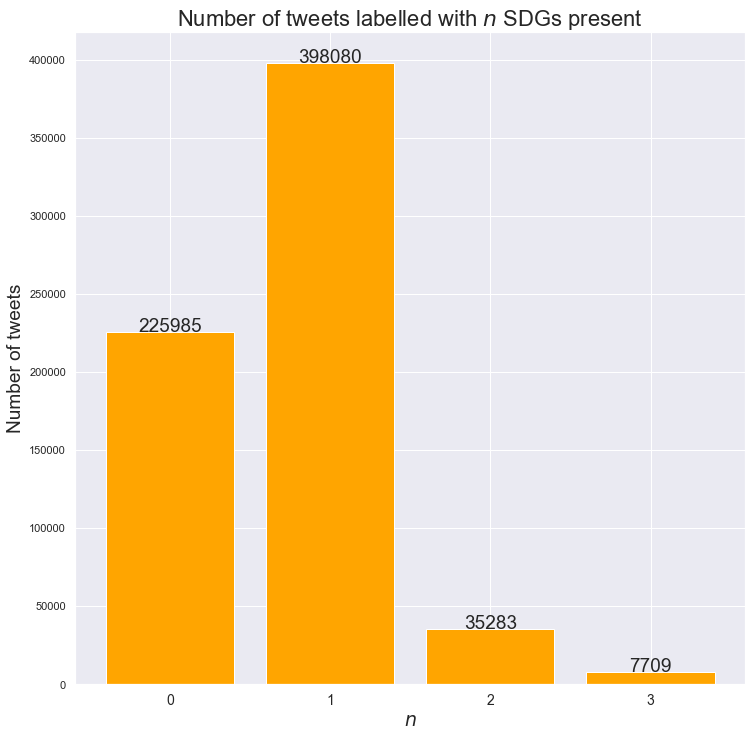

In [25]:
fig = plt.figure(figsize=(12,12))
x = range(4)
y = [len(en_df[en_df['nclasses'] == i]) for i in x]
# print(x,y)
plt.bar(x, y, color='orange')
for xi, yi in zip(x, y):
    plt.text(xi,yi,yi,ha='center', fontsize=19)
plt.title("Number of tweets labelled with $n$ SDGs present",fontsize=22)
plt.xticks(x,x, fontsize=14)
plt.xlabel("$n$", fontsize=19)
plt.ylabel("Number of tweets", fontsize=19)
plt.show()

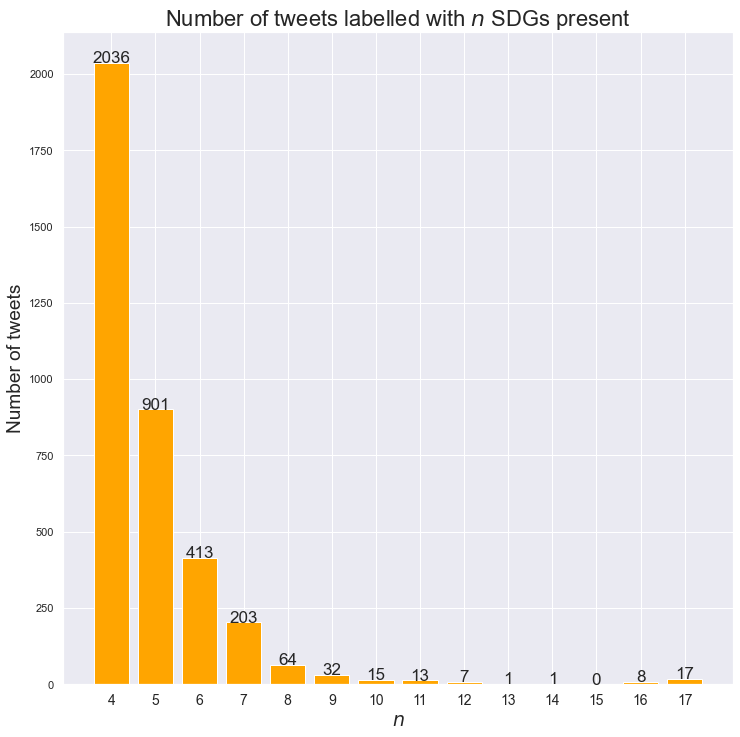

In [26]:
fig = plt.figure(figsize=(12,12))
x = range(4,18)
y = [len(en_df[en_df['nclasses'] == i]) for i in x]
# print(x,y)
plt.bar(x, y, color='orange')
for xi, yi in zip(x, y):
    plt.text(xi,yi,yi,ha='center', fontsize=17)
plt.title("Number of tweets labelled with $n$ SDGs present",fontsize=22)
plt.xticks(x,x, fontsize=14)
plt.xlabel("$n$", fontsize=19)
plt.ylabel("Number of tweets", fontsize=19)
plt.show()

## Tweet distribution

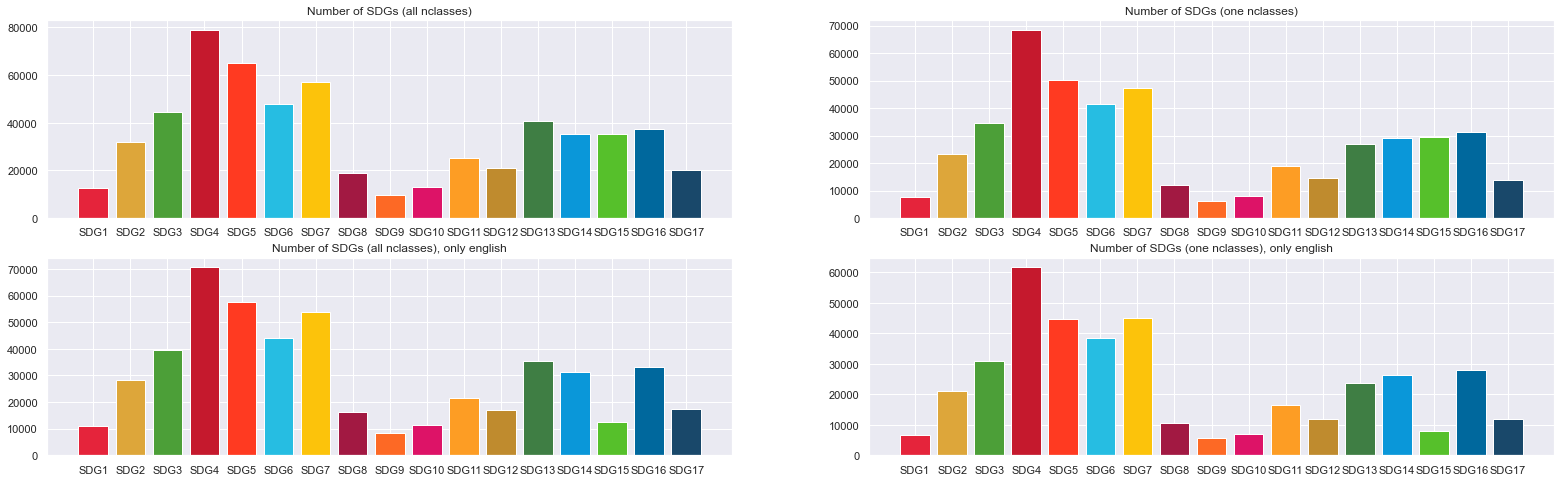

In [27]:
plt.figure(figsize=(27, 8))
plt.subplot(2,2,1)
plt.bar(range(1,18),[np.sum(df[f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (all nclasses)")
plt.subplot(2,2,2)
plt.bar(range(1,18),[np.sum(df[df['nclasses'] == 1][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (one nclasses)")
plt.subplot(2,2,3)
plt.bar(range(1,18),[np.sum(en_df[f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (all nclasses), only english")
plt.subplot(2,2,4)
plt.bar(range(1,18),[np.sum(en_df[en_df['nclasses'] == 1][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (one nclasses), only english")
plt.show()

In [28]:
x = np.array([np.sum(en_df[f'#sdg{i}']) for i in range(1,18)])

In [29]:
x[[0, 7,8,9,10,14]].sum()/x.sum()

0.1594965701981794

## Tweet length

In [30]:
text_length = np.zeros(17)
word_text_length = np.zeros(17)

for i in range(1,18):
    for text in en_df[en_df[f'#sdg{i}'] == True]['text']:
        text_length[i-1] += len(text)
        word_text_length[i-1] += len(text.split())

text_length = text_length/([np.sum(en_df[f'#sdg{i}']) for i in range(1,18)])
word_text_length = word_text_length/([np.sum(en_df[f'#sdg{i}']) for i in range(1,18)])

for i in range(17):
    print(f"Average text length for #SDG{i+1}: {np.round(text_length[i])} characters per tweet \t {np.round(word_text_length[i])} words per tweet")

Average text length for #SDG1: 220.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG2: 229.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG3: 229.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG4: 223.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG5: 225.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG6: 217.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG7: 239.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG8: 231.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG9: 226.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG10: 228.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG11: 230.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG12: 230.0 characters per tweet 	 29.0 words per tweet
Average text length for #

## Vocabulary

In [31]:
df_sub = en_df.loc[:, 'text']
texts = " ".join([text.lower() for text in df_sub])
search_pattern = r"(<(u\+)\w+>)|((#sdg)(\d+)?)|((http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-]))|[\r\n]"
texts = re.sub(search_pattern, "", texts)

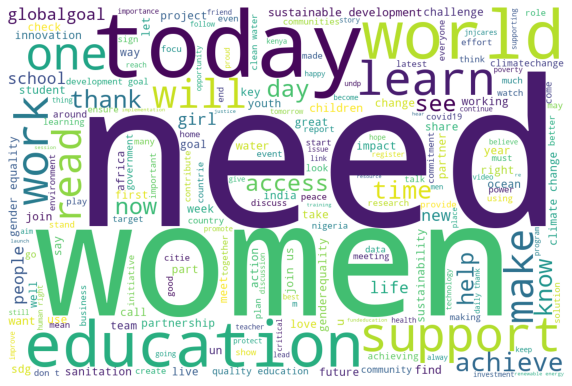

In [32]:
# Make a wordcloud for the English tweets and filter out certain words/character strings.

fig = plt.figure(figsize=(10,10))
stopwords = set(STOPWORDS)
stopwords.update(['s', 'amp'])
wordcloud = WordCloud(width=1080, height=720, stopwords=stopwords, background_color="white").generate(texts)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
word_dict = WordCloud(stopwords=stopwords).process_text(texts)
word_dict = {k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1])}
list(word_dict.items())[-20:]

[('now', 11917),
 ('access', 11926),
 ('see', 11959),
 ('day', 12430),
 ('thank', 12993),
 ('know', 12994),
 ('time', 13545),
 ('achieve', 14566),
 ('make', 14758),
 ('read', 14924),
 ('will', 15027),
 ('work', 15152),
 ('one', 15390),
 ('learn', 15799),
 ('support', 17230),
 ('education', 18869),
 ('world', 21526),
 ('today', 23644),
 ('women', 23983),
 ('need', 24707)]

# Scopus

In [95]:
s_df = pd.read_csv('data/raw/scopus_ready_to_use.csv')
s_df = s_df.drop(columns=["Unnamed: 0"])

In [96]:
s_df.head()

,Title,Year,Link,Abstract,Author.Keywords,Index.Keywords,EID,text,sdg1,sdg2,...,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17,nclasses
0,Counting the Costs: A Method for Evaluating th...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"As we enter the decade of action on the SDGs, ...",agenda 2030; costing; goal 11; hard costs; inf...,NaN,2-s2.0-85107828156,Counting the Costs: A Method for Evaluating th...,False,False,...,False,False,True,False,False,False,False,False,False,1
1,Water research in support of the Sustainable D...,2020,https://www.scopus.com/inward/record.uri?eid=2...,Reaching the Sustainable Development Goal (SDG...,Belgium; Bibliometrics; Global South; North-So...,Climate change; Environmental protection; Plan...,2-s2.0-85090699582,Water research in support of the Sustainable D...,False,False,...,False,False,False,False,False,False,False,False,False,1
2,Global & geographical mapping and visualizatio...,2020,https://www.scopus.com/inward/record.uri?eid=2...,This paper presents a new knowledge base creat...,Actuation; AI; Big Data; Biographical Data; Cy...,Blood; Blood pressure; Health; Health risks; I...,2-s2.0-85099263145,Global & geographical mapping and visualizatio...,False,False,...,False,False,False,False,False,False,False,False,False,1
3,Learning from sustainability practice: case ex...,2020,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The purpose of this paper is to ident...,Hotels; Integrated social responsibility; Sust...,NaN,2-s2.0-85089153318,Learning from sustainability practice: case ex...,False,False,...,False,True,False,False,False,False,False,False,False,2
4,"Measuring What Matters, Where It Matters: A Sp...",2020,https://www.scopus.com/inward/record.uri?eid=2...,The Urban Environment and Social Inclusion Ind...,cities; equity; indices; new urban agenda; soc...,NaN,2-s2.0-85123219889,"Measuring What Matters, Where It Matters: A Sp...",False,False,...,False,False,True,False,False,False,False,False,False,1


In [101]:
print(f"Scopus average number of characters per abstact {np.mean(s_df['Abstract'].apply(len))}")
print(f"Scopus minimum number of characters in an abstract {np.min(s_df['Abstract'].apply(len))}")
print(f"Scopus maximum number of characters in an abstract {np.max(s_df['Abstract'].apply(len))}")

Scopus average number of characters per abstact 1665.1734563971993
Scopus minimum number of characters in an abstract 23
Scopus maximum number of characters in an abstract 10237


In [102]:
print(f"Scopus average number of tokens per abstact {np.mean(s_df['Abstract'].apply(lambda a: len(a.split(' '))))}")
print(f"Scopus minimum number of tokens in an abstract {np.min(s_df['Abstract'].apply(lambda a: len(a.split(' '))))}")
print(f"Scopus maximum number of tokens in an abstract {np.max(s_df['Abstract'].apply(lambda a: len(a.split(' '))))}")

Scopus average number of tokens per abstact 240.37364735837048
Scopus minimum number of tokens in an abstract 3
Scopus maximum number of tokens in an abstract 1557


In [109]:
np.argmin(s_df["Abstract"].apply(len))

166

In [110]:
s_df.loc[166, 'Abstract']

'[No abstract available]'

In [112]:
print(f"{len(s_df[s_df['Abstract']=='[No abstract available]'])} ({np.round(len(s_df[s_df['Abstract']=='[No abstract available]'])/len(s_df)*100,2)}%) datapoints do not have an abstract")

47 (1.5%) datapoints do not have an abstract


In [114]:
no_abstract_idx = np.where(s_df['Abstract'].apply(len) == np.min(s_df['Abstract'].apply(len)))

In [115]:
s_df.loc[no_abstract_idx[0], "Abstract"]

166     [No abstract available]
250     [No abstract available]
468     [No abstract available]
603     [No abstract available]
842     [No abstract available]
843     [No abstract available]
844     [No abstract available]
845     [No abstract available]
846     [No abstract available]
847     [No abstract available]
848     [No abstract available]
849     [No abstract available]
850     [No abstract available]
851     [No abstract available]
852     [No abstract available]
853     [No abstract available]
854     [No abstract available]
855     [No abstract available]
856     [No abstract available]
857     [No abstract available]
858     [No abstract available]
997     [No abstract available]
1278    [No abstract available]
1279    [No abstract available]
1423    [No abstract available]
1426    [No abstract available]
1515    [No abstract available]
1516    [No abstract available]
1517    [No abstract available]
1526    [No abstract available]
1638    [No abstract available]
1732    

In [116]:
s_df = s_df.drop(index = no_abstract_idx[0])

In [117]:
print(f"Scopus average number of characters per abstact {np.mean(s_df['Abstract'].apply(len))}")
print(f"Scopus minimum number of characters in an abstract {np.min(s_df['Abstract'].apply(len))}")
print(f"Scopus maximum number of characters in an abstract {np.max(s_df['Abstract'].apply(len))}")

Scopus average number of characters per abstact 1690.1111470113085
Scopus minimum number of characters in an abstract 256
Scopus maximum number of characters in an abstract 10237


In [118]:
print(f"Scopus average number of tokens per abstact {np.mean(s_df['Abstract'].apply(lambda a: len(a.split(' '))))}")
print(f"Scopus minimum number of tokens in an abstract {np.min(s_df['Abstract'].apply(lambda a: len(a.split(' '))))}")
print(f"Scopus maximum number of tokens in an abstract {np.max(s_df['Abstract'].apply(lambda a: len(a.split(' '))))}")

Scopus average number of tokens per abstact 243.978352180937
Scopus minimum number of tokens in an abstract 36
Scopus maximum number of tokens in an abstract 1557


In [129]:
s_df.loc[2,'Abstract']

'This paper presents a new knowledge base creation method for personal/collective health data with knowledge of preemptive care and potential risk inspection with a global and geographical mapping and visualization functions of 5D World Map System. The final goal of this research project is a realization of a system to analyze the personal health/bio data and potential-risk inspection data and provide a set of appropriate coping strategies and alert with semantic computing technologies. The main feature of 5D World Map System is to provide a platform of collaborative work for users to perform a global analysis for sensing data in a physical space along with the related multimedia data in a cyber space, on a single view of time-series maps based on the spatiotemporal and semantic correlation calculations. In this application, the concrete target data for world-wide evaluation is (1) multi-parameter personal health/bio data such as blood pressure, blood glucose, BMI, uric acid level etc.

## Scopus distribution

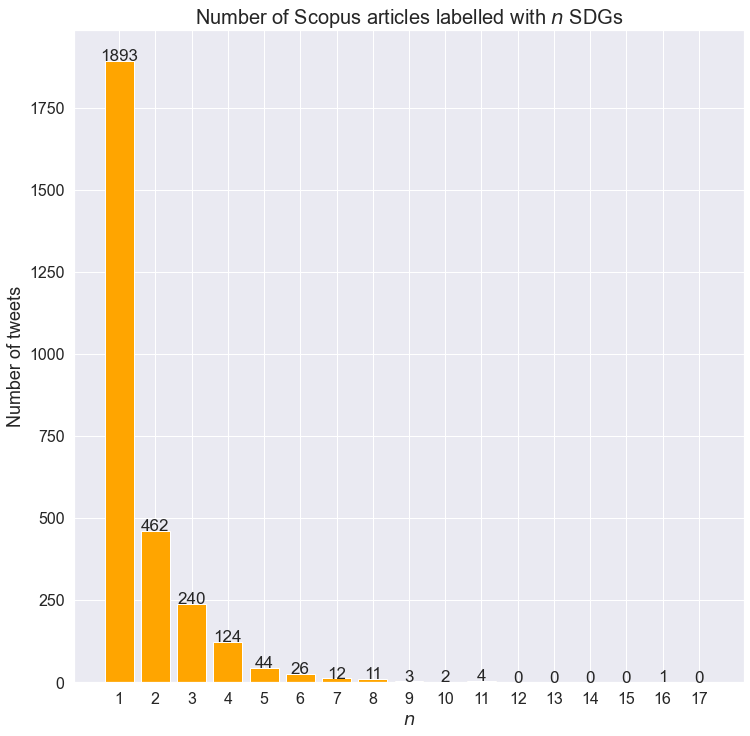

In [119]:
fig = plt.figure(figsize=(12,12))
x = range(1,18)
y = [len(s_df[s_df['nclasses'] == i]) for i in x]
# print(x,y)
plt.bar(x, y, color='orange')
for xi, yi in zip(x, y):
    plt.text(xi,yi,yi,ha='center', fontsize=17)
plt.title("Number of Scopus articles labelled with $n$ SDGs", fontsize=20)
plt.xticks(x,x, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$n$", fontsize=18)
plt.ylabel("Number of tweets",fontsize=18)
plt.show()

In [46]:
scopus_texts = " ".join([text.lower() for text in s_df.loc[:, 'Abstract']])
search_pattern = r"(<(u\+)\w+>)|((#sdg)(\d+)?)|((http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-]))|[\r\n]"
scopus_texts = re.sub(search_pattern, "", scopus_texts)

In [47]:
word_dict_ = WordCloud(stopwords=stopwords).process_text(scopus_texts)
word_dict_ = {k: v for k, v in sorted(word_dict_.items(), key=lambda item: item[1])}
list(word_dict_.items())[-20:]

[('data', 845),
 ('need', 848),
 ('goals sdg', 850),
 ('used', 853),
 ('target', 858),
 ('use', 862),
 ('water', 863),
 ('indicator', 865),
 ('author', 898),
 ('well', 906),
 ('result', 934),
 ('system', 965),
 ('using', 1003),
 ('research', 1061),
 ('elsevier inc', 1155),
 ('study', 1215),
 ('based', 1335),
 ('development goal', 1926),
 ('sustainable development', 2588),
 ('sdg', 3189)]

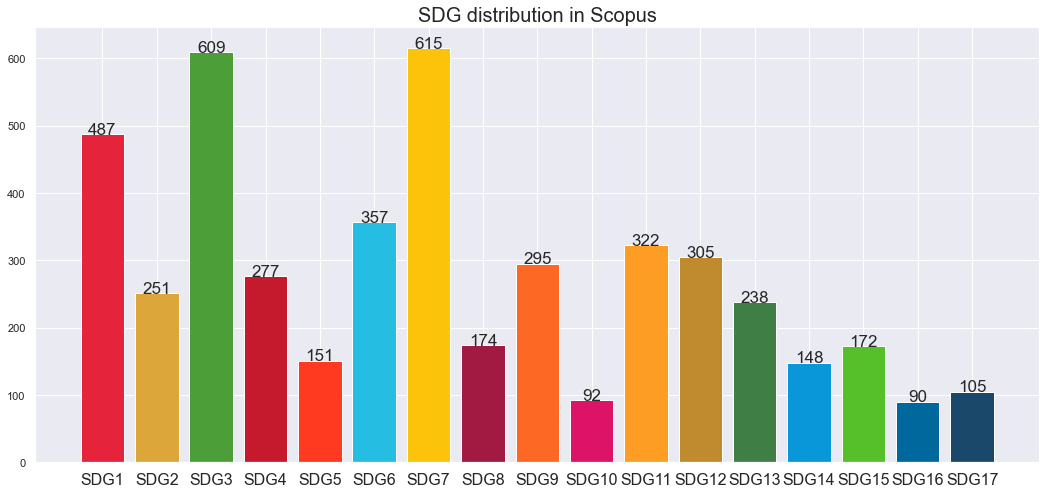

In [48]:
fig = plt.figure(figsize=(18,8))
x = range(1, 18)
y = [s_df[f"sdg{i}"].sum() for i in x]
plt.bar(x, y, color=sdg_colors)
for xi, yi in zip(x, y):
    plt.text(xi,yi,yi,ha='center', fontsize=17)
plt.title("SDG distribution in Scopus", fontsize=20)
plt.xticks(x, [f"SDG{i}" for i in x], fontsize=16)
plt.show()